In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
#for hyper parameter tuning

import logging


In [17]:
en=pd.read_csv('/content/drive/MyDrive/Dataset/Emotional_H/english.csv')
df=pd.read_csv('/content/drive/MyDrive/Dataset/Emotional_H/deepfake.csv')

In [26]:
en.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-292.09140,107.465470,-44.139664,44.164894,-17.887180,-12.471088,-3.590851,-7.044466,-7.811891,-6.014476,...,-3.393049,-5.738670,-5.255382,-1.789235,-2.641787,0.179766,2.768640,4.179280,6.194175,6.816234
1,-318.74023,95.526634,-39.401190,27.715158,-22.705025,-6.303997,-8.845734,-5.550812,-3.317510,-11.346023,...,-3.222558,-2.474380,-3.832746,-0.532228,0.773945,-2.555231,1.881754,1.472017,3.019983,5.518497
2,-315.53300,92.288320,-40.423940,34.508945,-18.966896,-4.724031,-8.200342,-17.788260,-7.930902,-5.146730,...,-4.448881,-3.247578,-5.742671,-3.982553,-1.573804,-2.270712,2.832158,2.902952,4.061225,5.034604
3,-301.56680,83.467590,-43.062504,54.350730,-23.995485,0.010661,-7.562350,-6.149078,-7.499183,-4.696762,...,-3.844912,-3.790015,-5.441263,-4.541252,-1.572427,-4.257127,0.672187,1.667025,4.608165,6.336764
4,-370.59442,111.891780,17.380352,15.352755,20.350155,-5.587485,2.570047,-5.771169,0.900893,1.253922,...,-3.528444,-1.668683,-5.351765,-2.553765,-4.650506,-4.515150,-2.736658,-2.733803,-2.883491,-1.746059


In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-384.56560,41.313190,-22.512484,9.647027,-2.853703,-3.265914,-3.560151,1.136599,-6.335774,2.084825,...,-1.918954,0.837745,-0.662066,1.022848,0.352392,1.674392,1.557137,3.480937,3.655131,4.517235
1,-223.81729,56.277252,-44.560738,30.841774,-6.800030,-9.480381,-12.553636,-2.488934,-20.258568,1.055871,...,-1.938011,-0.318601,-2.191073,-0.846907,-0.599855,-0.128816,-0.673368,1.305002,0.397836,1.175030
2,-287.55120,38.495940,-46.022034,-4.306948,-39.552410,-0.064860,-1.571697,0.129822,-6.651174,0.442882,...,-1.395410,2.495563,0.403445,0.287585,-0.272511,-2.372126,-1.631154,2.808672,0.088064,3.085620
3,-283.81073,78.969185,-44.129803,34.145170,-33.359930,-0.670134,-29.290794,2.737740,-13.425995,-9.304039,...,2.683249,-0.263922,-0.916600,0.135817,0.230657,-1.542825,1.075186,-0.209143,-0.290686,2.055822
4,-314.64250,65.129330,-39.895107,46.261517,-27.292423,-3.164591,-28.973036,2.349446,-11.545103,-14.825808,...,1.965076,0.952093,0.326784,1.249048,2.197192,0.238264,1.979593,0.817636,0.773652,2.356442


In [8]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [87]:
def autoencoder(data,test):
  data['label']=0
  test['label']=1
  X_train, X_test =train_test_split(data,test_size=0.2,random_state=42)
  X_train1=X_train[X_train['label']==0]
  X_test=pd.concat([X_test,test],ignore_index=True)
  X_train1=X_train1.drop(['label'],axis=1)
  X_train=X_train.drop(['label'],axis=1)
  y_test=X_test['label']
  X_test=X_test.drop(['label'],axis=1)
  input_dim = X_train.shape[1]
  encoding_dim = 100
  input_layer = Input(shape=(input_dim, ))
  encoder = Dense(encoding_dim, activation="tanh",
                  activity_regularizer=regularizers.l1(10e-5))(input_layer)
  encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

  decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
  decoder = Dense(input_dim, activation='relu')(decoder)
  autoencoder = Model(inputs=input_layer, outputs=decoder)


  nb_epoch = 30
  batch_size = 16

  autoencoder.compile(optimizer='adam',
                      loss='mean_squared_error',
                      metrics=['accuracy'])

  checkpointer = ModelCheckpoint(filepath="model.h5",
                                verbose=0,
                                save_best_only=True)
  tensorboard = TensorBoard(log_dir='./logs',
                            histogram_freq=0,
                            write_graph=True,
                            write_images=True)

  history = autoencoder.fit(X_train1, X_train1,
                      epochs=nb_epoch,
                      batch_size=batch_size,
                      shuffle=True,
                      validation_data=(X_test, X_test),
                      verbose=1,
                      callbacks=[checkpointer, tensorboard]).history
  predictions = autoencoder.predict(X_test)


  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                          'true_class': y_test})
  return error_df,y_test


In [80]:
def plot(error_df,threshold):
  groups = error_df.groupby('true_class')
  fig, ax = plt.subplots()

  for name, group in groups:
      ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
              label= "Synthetic Ai voice" if name == 1 else "Real User Voice")
  ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
  ax.legend()
  plt.title("Reconstruction error for different classes")
  plt.ylabel("Reconstruction error")
  plt.xlabel("Data point index")
  plt.show();


In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [81]:
scalar=MinMaxScaler()
en1=pd.DataFrame(scalar.fit_transform(en),columns=en.columns)
df1=pd.DataFrame(scalar.fit_transform(df),columns=df.columns)

In [88]:
[e,y_test]=autoencoder(en1,df1)

Epoch 1/30
1926/1926 [==============================] - 7s 3ms/step - loss: 0.0185 - accuracy: 0.5792 - val_loss: 0.0109 - val_accuracy: 0.8028
Epoch 2/30
  30/1926 [..............................] - ETA: 6s - loss: 0.0107 - accuracy: 0.8146

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1926/1926 [==============================] - 5s 3ms/step - loss: 0.0084 - accuracy: 0.8789 - val_loss: 0.0046 - val_accuracy: 0.9169
Epoch 3/30
1926/1926 [==============================] - 5s 2ms/step - loss: 0.0045 - accuracy: 0.9467 - val_loss: 0.0044 - val_accuracy: 0.9453
Epoch 4/30
1926/1926 [==============================] - 8s 4ms/step - loss: 0.0044 - accuracy: 0.9547 - val_loss: 0.0044 - val_accuracy: 0.9484
Epoch 5/30
1926/1926 [==============================] - 6s 3ms/step - loss: 0.0043 - accuracy: 0.9558 - val_loss: 0.0043 - val_accuracy: 0.9593
Epoch 6/30
1926/1926 [==============================] - 6s 3ms/step - loss: 0.0043 - accuracy: 0.9564 - val_loss: 0.0043 - val_accuracy: 0.9510
Epoch 7/30
1926/1926 [==============================] - 5s 2ms/step - loss: 0.0042 - accuracy: 0.9531 - val_loss: 0.0042 - val_accuracy: 0.9583
Epoch 8/30
1926/1926 [==============================] - 5s 2ms/step - loss: 0.0042 - accuracy: 0.9518 - val_loss: 0.0042 - val_accuracy: 0.9483
Epo

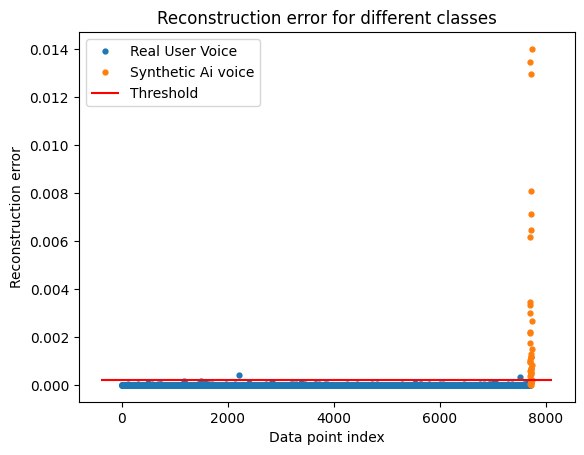

In [91]:
plot(e,0.0002)

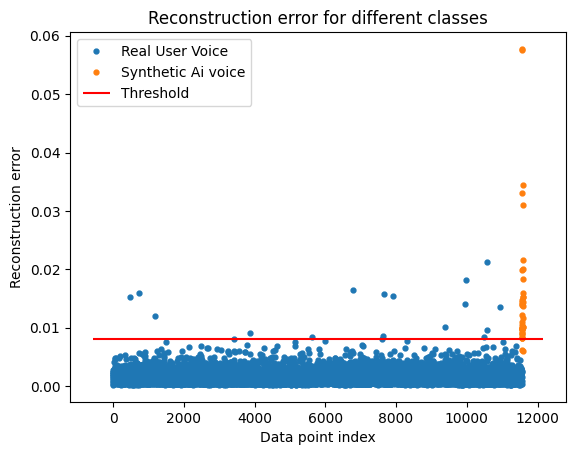

In [84]:
plot(e,0.008)

In [64]:
from sklearn.metrics import confusion_matrix

In [85]:
def cf(error_df,threshold):
  y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
  conf_matrix = confusion_matrix(y_test, y_pred)
  LABELS = ["User1", "User2"]
  plt.figure(figsize=(12, 12))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

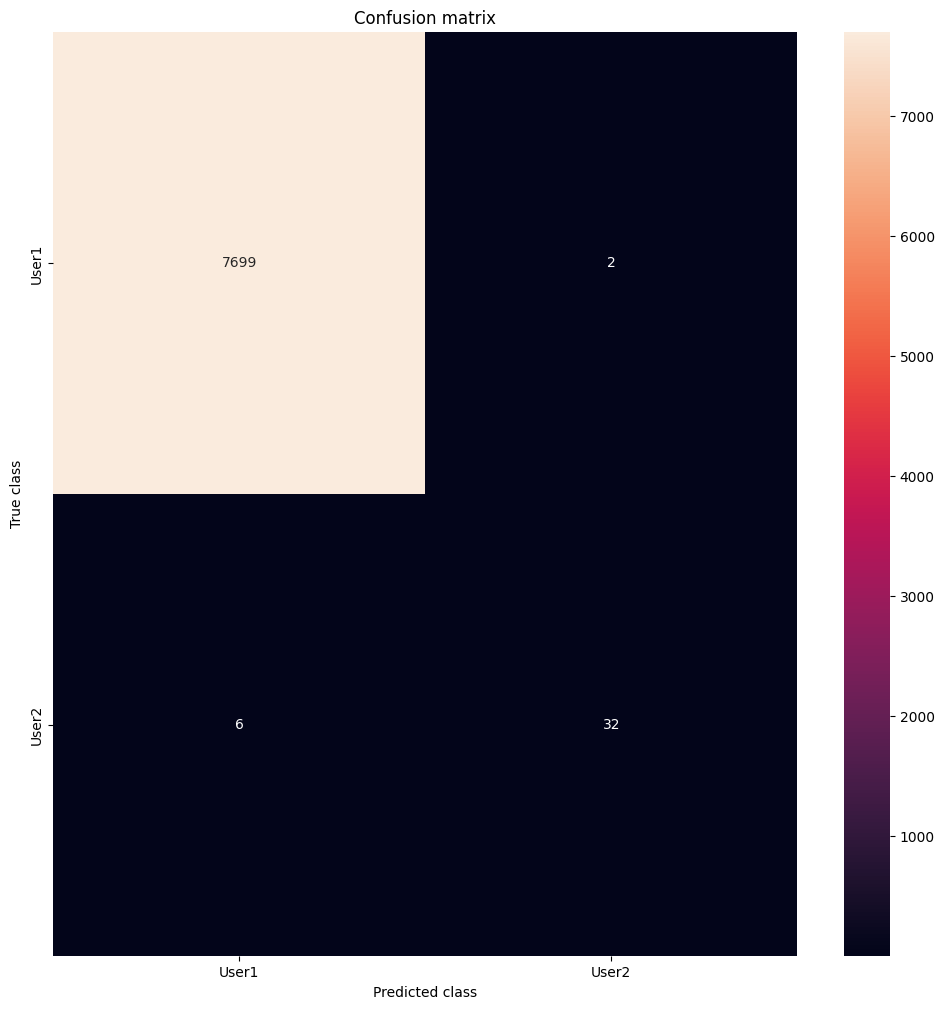

In [93]:
cf(e,0.0002)